In [294]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.font_manager import FontProperties
import os

In [295]:
font_path = 'C:\\Windows\\Fonts\\simsun.ttc'  # 宋體
font_prop = FontProperties(fname=font_path)

mode = 'show'   # 'show' or 'save'

In [ ]:
def plot_d1(derivative, Name, i, Feature):
    
    x = np.linspace(0, len(derivative[0]), len(derivative[0]))
    plt.figure()
    plt.plot(derivative[0])
    plt.plot(x[Feature], derivative[0][Feature], '*', label='Peak')
    plt.title(f'{Name}, {i + 1}th Left_Right',fontproperties=font_prop)
    plt.legend()
    plt.grid()
    if mode == 'show':
        plt.show()
    else:
        plt.savefig(f'{graph_path}\\{Name}, {i + 1}th d1.jpg')
    #plt.show()

In [ ]:
def calculate_d1(derivative, Name, i, Feature):
    #derivative = process_wave(cycle)
    
    d1_peak_x, d1_peak_y = find_peaks(derivative[0], height=0, distance=800)
    d1_valley_x,d1_valley_y = find_peaks(derivative[0] * -1, height=0, distance=800)

    d1_peak_y = d1_peak_y['peak_heights']
    d1_valley_y = d1_valley_y['peak_heights']

    print(d1_peak_y, d1_valley_y)


    feature = [d1_peak_x, d1_valley_x]
    # plot_d1(derivative, Name, i, feature)

In [296]:
def plot_d2(waveform, derivative, Name, i, Feature, hands, locate):
    
    x = np.linspace(0, len(derivative), len(derivative))
    plt.figure()
    
    plt.plot(waveform)
    plt.plot(derivative[5:1995])
    plt.plot(x[Feature], waveform[Feature], '*', label='Peak')
    plt.title(f'{Name}, {i}th {hands}',fontproperties=font_prop)
    plt.legend()
    plt.grid()
    if mode == 'show':
        plt.show()

In [298]:
def calculate_d2(waveform, derivative, Name, i, mode, hands):
    zero_crossings = np.where(np.diff(np.sign(derivative)))[0]


    if mode =='show':
        plot_d2(waveform,derivative, Name, i, zero_crossings, hands, "F:\\TDPPG")
        print(zero_crossings)

In [ ]:
#!d1


自動
Normal1


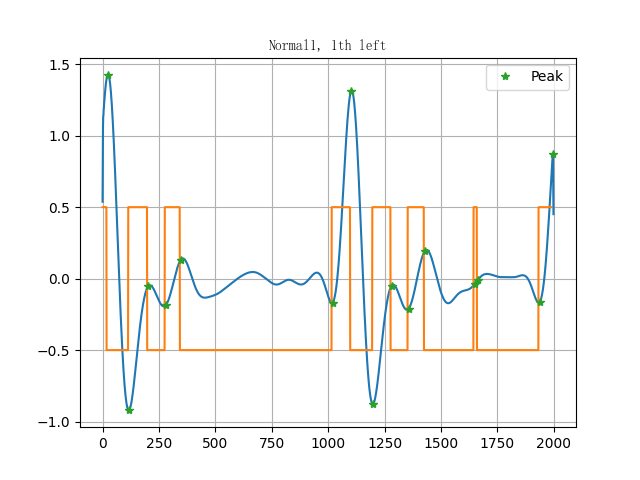

[  22  118  202  280  347 1020 1102 1200 1281 1357 1429 1649 1664 1937
 1996]
自動
Normal2


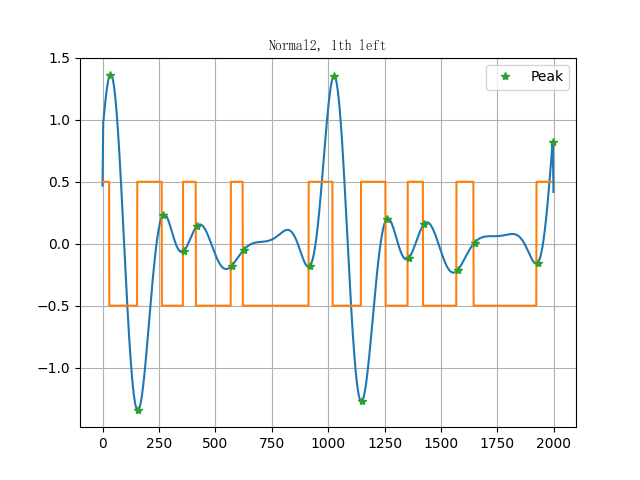

[  34  158  267  361  418  573  626  918 1024 1150 1259 1357 1425 1573
 1649 1928 1995]
手動
['Normal3', ' 1th left d2.npy']


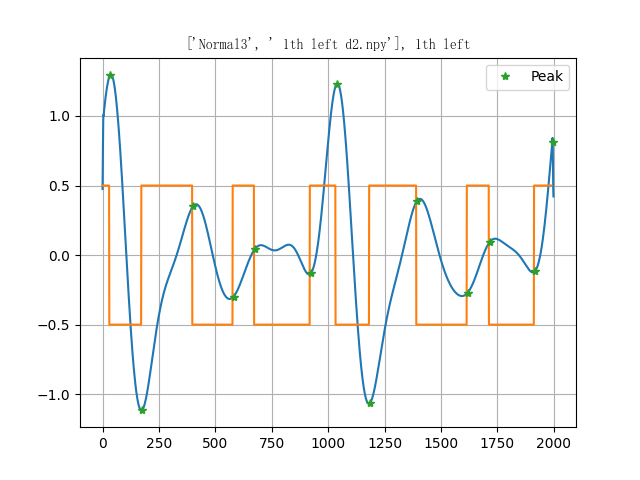

[  34  176  402  581  676  923 1037 1186 1395 1619 1717 1917 1994]
找不到檔案
自動
Normal5


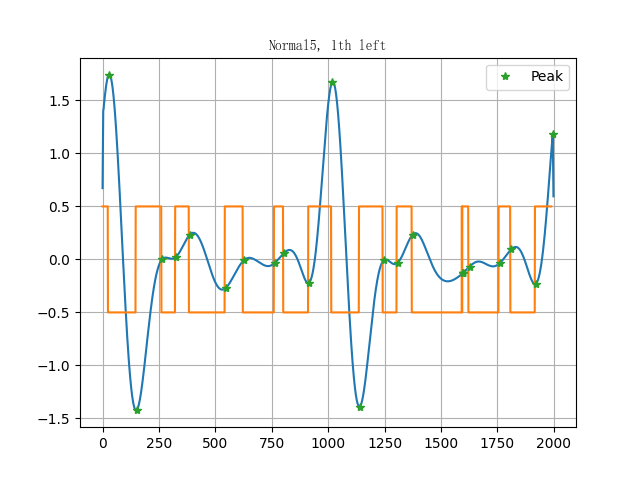

[  28  151  265  326  387  546  626  764  805  916 1018 1141 1246 1308
 1375 1597 1598 1599 1626 1760 1812 1921 1995]
自動
Normal6


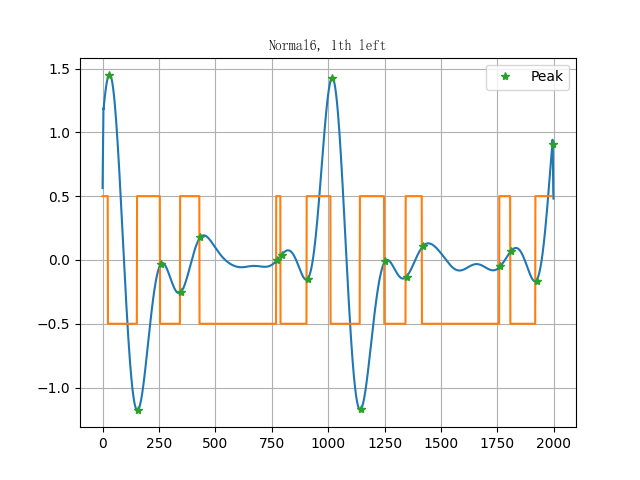

[  28  157  259  348  434  774  793  909 1015 1145 1253 1348 1420 1763
 1812 1923 1994]
手動
['Normal7', ' 1th left d2.npy']


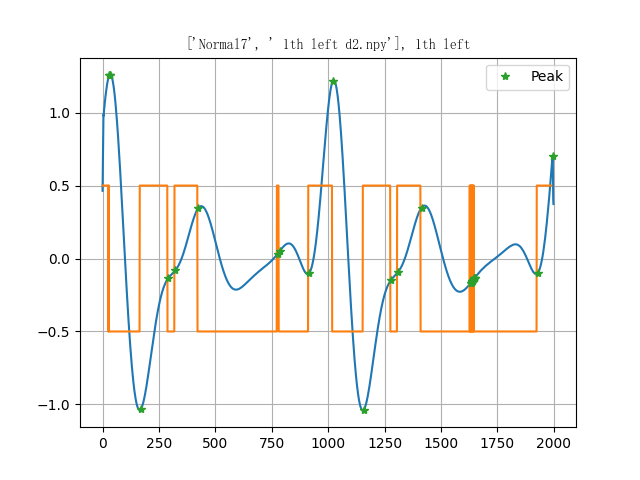

[  30   31   32  169  292  323  425  777  785  916 1022 1158 1280 1310
 1414 1632 1633 1635 1636 1637 1639 1640 1642 1643 1645 1646 1648 1649
 1650 1929 1995]
自動
Normal8


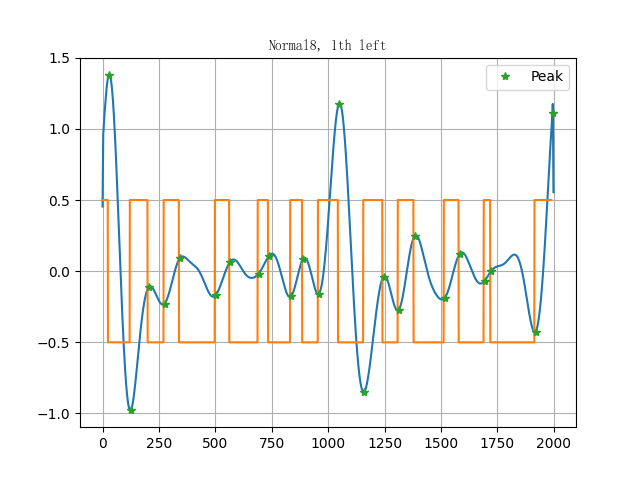

[  28  125  204  275  343  502  566  692  738  836  889  959 1048 1160
 1245 1313 1383 1517 1583 1694 1723 1919 1995]
手動
['Normal9', ' 1th left d2.npy']


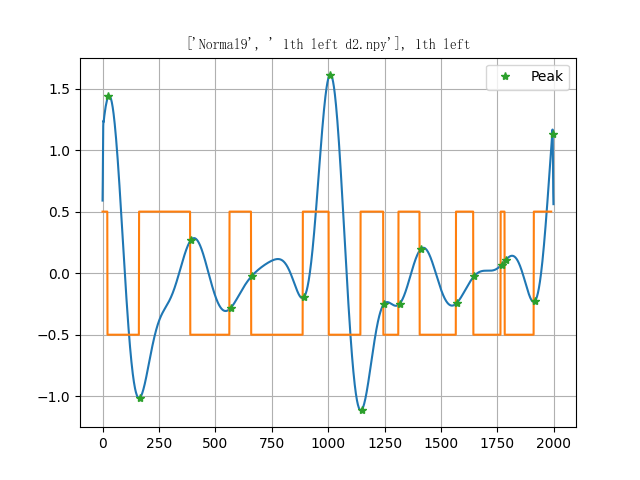

[  26  166  393  567  663  892 1007 1148 1249 1316 1410 1571 1648 1769
 1787 1916 1994]
自動
Normal10


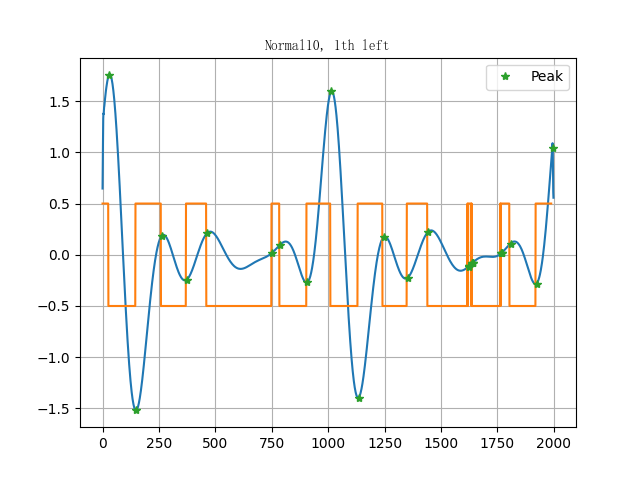

[  30  150  263  374  464  753  788  908 1014 1135 1245 1353 1444 1622
 1623 1625 1639 1640 1641 1767 1769 1770 1808 1924 1994]
自動
Normal11


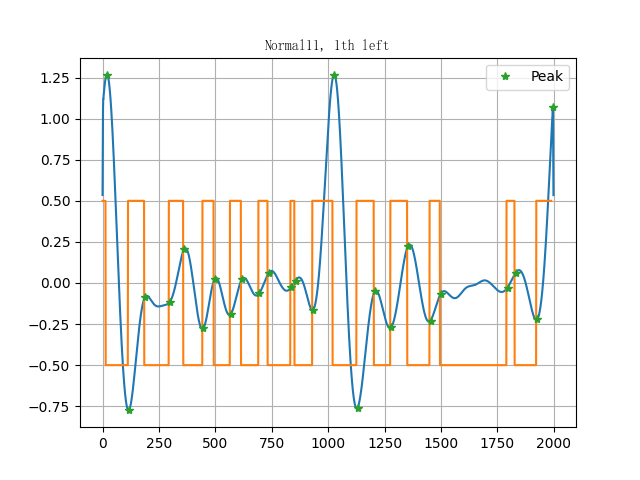

[  18  117  189  298  362  447  497  569  618  695  736  837  855  934
 1024 1130 1207 1280 1355 1454 1500 1795 1831 1927 1996]
自動
Normal12


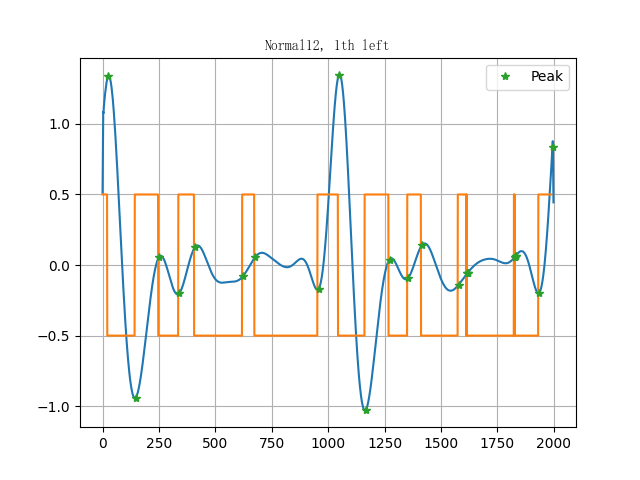

[  25  147  251  340  410  623  677  957 1048 1166 1272 1355 1416 1579
 1617 1618 1619 1828 1829 1830 1831 1936 1995]
自動
Normal13


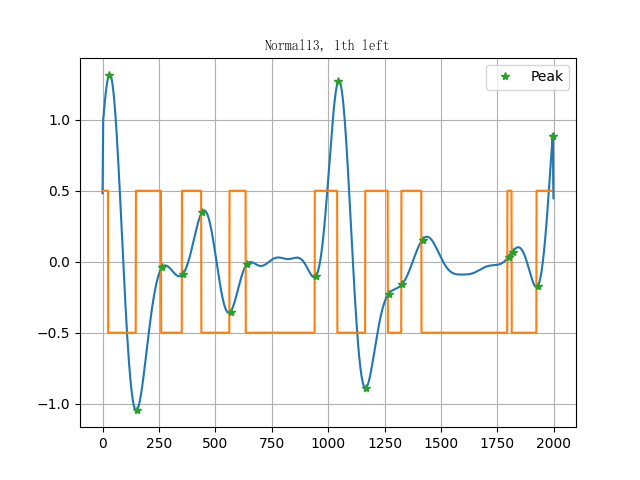

[  29  152  264  356  442  567  639  945 1045 1169 1269 1329 1418 1799
 1818 1928 1995]
自動
Normal14


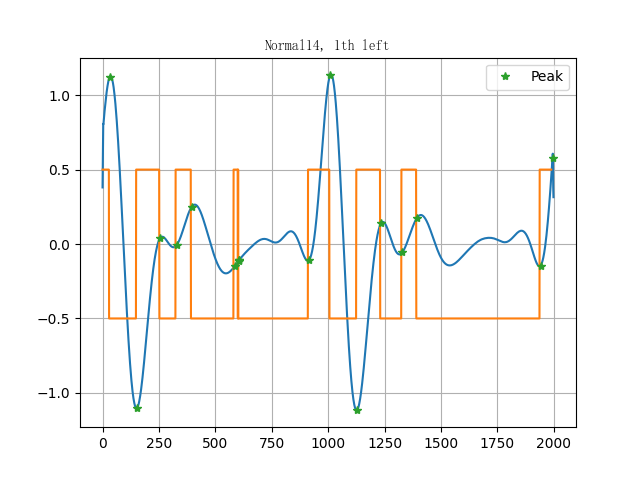

[  33  153  256  328  396  585  604  605  606  915 1010 1129 1235 1329
 1395 1942 1995]
自動
Normal15


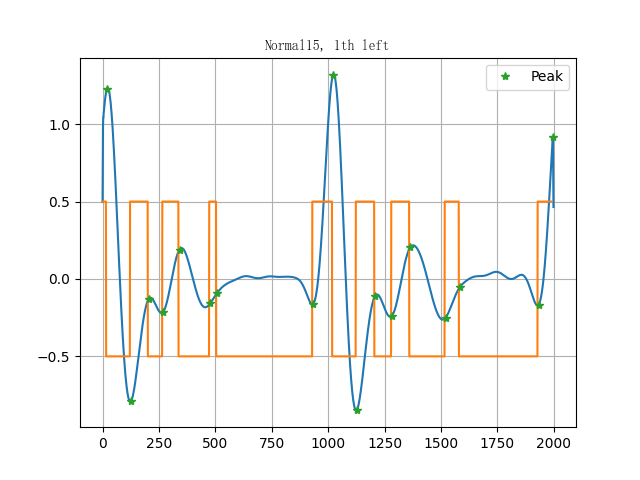

[  20  126  205  269  341  477  508  934 1022 1127 1209 1284 1364 1521
 1584 1933 1996]
自動
Normal16


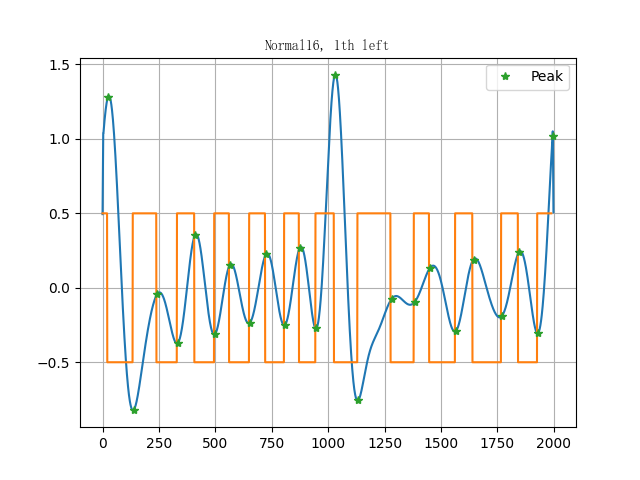

[  25  138  243  334  411  499  565  654  725  809  875  948 1030 1134
 1281 1384 1452 1567 1644 1771 1846 1931 1995]
找不到檔案
自動
Normal18


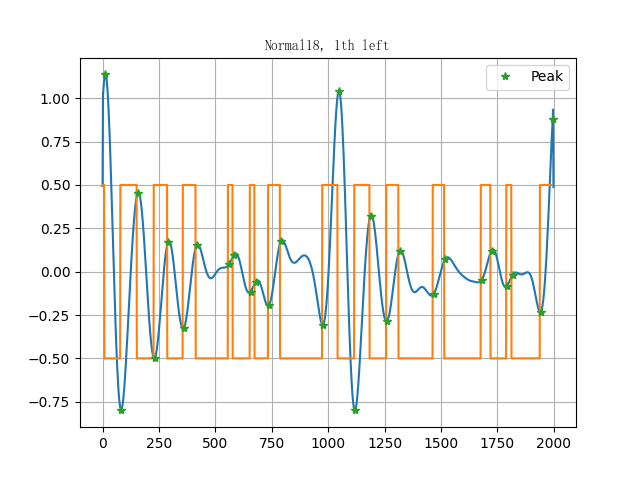

[  12   83  156  231  291  360  417  560  581  657  678  738  791  978
 1046 1120 1188 1262 1316 1468 1519 1681 1724 1794 1817 1943 1996]
自動
Normal19


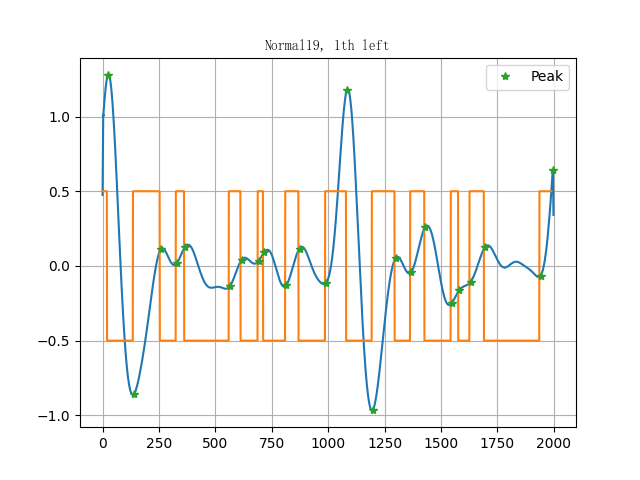

[  24  139  258  329  366  564  616  692  716  814  873  991 1084 1198
 1299 1368 1431 1548 1581 1631 1695 1941 1996]


In [299]:
#!d2
for j in range(1, 20):   
    Name = j
    i = 1
    hands = 0


    if hands == 0:
        hands = 'left'
    else:
        hands = 'right'

    file = f'F:\\Normal_Signal\\Normal{Name}, {i}th {hands} d2.npy'
    file2 = f'F:\\Normal_Signal\\bad signal\\Normal{Name}, {i}th {hands} d2.npy'
    # 若找不到檔案，換另一個位址
    if os.path.isfile(file):
        print("自動")
        Name = file.split('\\')[2].split(',')[0]
        i = int(file.split('\\')[2].split(',')[1].split(' ')[1][:-2])
        hand = file.split('\\')[2].split(',')[1].split(' ')[2]
        data = np.load(file)
    elif os.path.isfile(file2):
        print("手動")
        Name = file.split('\\')[2].split(',')
        i = int(file.split('\\')[2].split(',')[1].split(' ')[1][:-2])
        hand = file.split('\\')[2].split(',')[1].split(' ')[2]
        data = np.load(file2)
    else:
        print("找不到檔案")
        continue
    print(Name)

    d3 = np.gradient(data, axis=0) * 50
    d3 = np.where(d3 > 0.1, 0.5, -0.5)

    calculate_d2(data, d3, Name, i, 'show', hand)
